# Create fake data from a given model and covariance

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 160
mpl.rcParams['figure.dpi'] = 160
from cup1d.data import data_Chabanier2019
from cup1d.data import data_Karacayli2022
from cup1d.data import data_QMLE_Ohio
from cup1d.data import mock_data

In [2]:
# setup data to mimic, with a maximum z to avoid redshifts not emulated
#data_label="Chabanier2019"
data_label="QMLE_Ohio"
zmin=2.0
zmax=4.5
if data_label=="Chabanier2019":
    data=data_Chabanier2019.P1D_Chabanier2019(zmin=zmin,zmax=zmax)
elif data_label=="Karacayli2022":
    data=data_Karacayli2022.P1D_Karacayli2022(zmin=zmin,zmax=zmax)
elif data_label=="QMLE_Ohio":
    data=data_QMLE_Ohio.P1D_QMLE_Ohio(zmin=zmin,zmax=zmax)

will read P1D file /Users/font/Projects/DESI/p1d_forecast//private_data/p1d_measurements//QMLE_Ohio//desi-y5fp-1.5-4-o3-deconv-power-qmle_kmax0.04.txt
2 low-k bins not included


In [3]:
mock=mock_data.Mock_P1D(data_label=data_label,zmin=zmin,zmax=zmax)

will read P1D file /Users/font/Projects/DESI/p1d_forecast//private_data/p1d_measurements//QMLE_Ohio//desi-y5fp-1.5-4-o3-deconv-power-qmle_kmax0.04.txt
2 low-k bins not included
Selected training set from Pedersen21
Selected custom emulator
Training GP on 330 points


 /Users/font/opt/anaconda3/envs/lace_env/lib/python3.8/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


GPs optimised in 0.36 seconds


In [4]:
keys = ['label','marker','data'] 
datasets = [dict(zip(keys,['data','*',data])),
            dict(zip(keys,['mock','.',mock]))]

In [5]:
def combined_plot(datasets,zmin=1.7,zmax=6.0,kmin=0.001,kmax=0.1):
    Ndata=len(datasets)
    for idata in range(Ndata):
        label=datasets[idata]['label']
        marker=datasets[idata]['marker']
        data=datasets[idata]['data']
        k_kms=data.k_kms
        kplot=(k_kms>kmin) & (k_kms<kmax)
        k_kms=k_kms[kplot]
        zs=data.z
        Nz=len(zs)
        for iz in range(Nz):
            z=zs[iz]
            if z < zmin: continue
            if z > zmax: continue
            Pk_kms=data.get_Pk_iz(iz)[kplot]
            err_Pk_kms=np.sqrt(np.diagonal(data.get_cov_iz(iz)))[kplot]    
            fact=k_kms/np.pi
            plt.errorbar(k_kms,fact*Pk_kms,
                         marker=marker,ms=4.5,ls="none",
                         yerr=fact*err_Pk_kms,
                         label=label+' z = {}'.format(z))
    plt.legend()
    plt.yscale('log', nonpositive='clip')
    plt.xscale('log')
    plt.ylabel(r'$k P(k)/ \pi$')

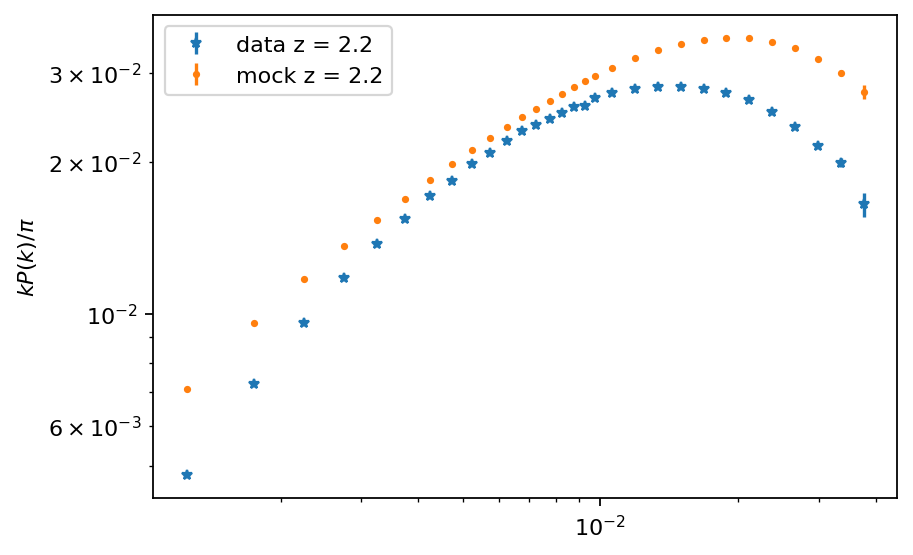

In [6]:
combined_plot(datasets,zmin=2.05,zmax=2.25,kmax=0.05)

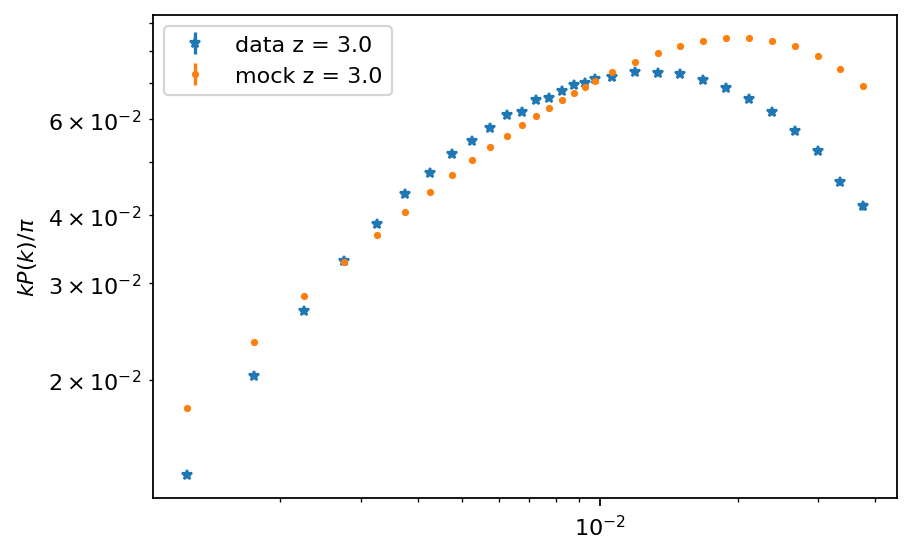

In [7]:
combined_plot(datasets,zmin=2.9,zmax=3.1,kmax=0.05)

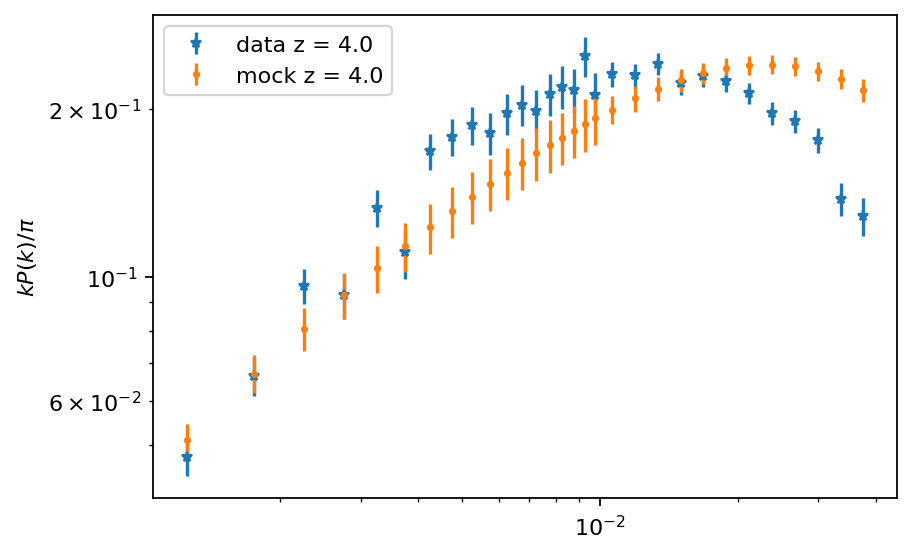

In [8]:
combined_plot(datasets,zmin=3.9,zmax=4.1,kmax=0.05)